# Clustering with DBSCAN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

import pandas as pd
import numpy as np


from sklearn import datasets
from sklearn import cluster

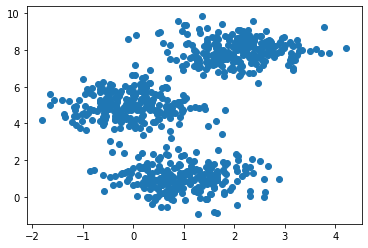

In [2]:
data, labels_true = datasets.make_blobs(n_samples=750, centers=[[1,1],[0,5],[2,8]], cluster_std=0.7,
                            random_state=0)


plt.scatter(data[:,0], data[:,1])

df = pd.DataFrame(data, columns=['X', 'Y'])

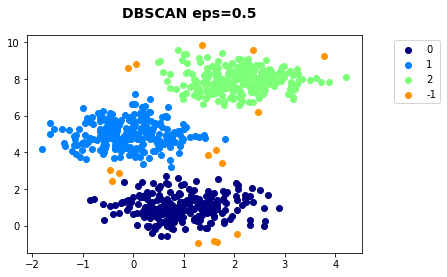

In [3]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)
label = dbscan.fit_predict(data)
df['label'] = label


fig = plt.figure()
fig.suptitle('DBSCAN eps=0.5', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=clusters[i], color=plt.cm.jet(float(i) / len(np.unique(label))))

    
_ = plt.legend(bbox_to_anchor=(1.25, 1))

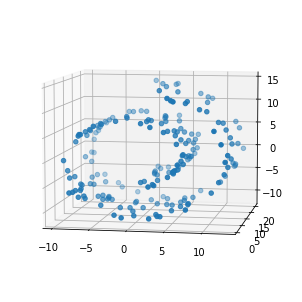

In [4]:
data, t = datasets.make_swiss_roll(n_samples=200, noise=0.1, random_state=0)

df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])


fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

_ = ax.scatter(df.X, df.Y, df.Z, 'o')

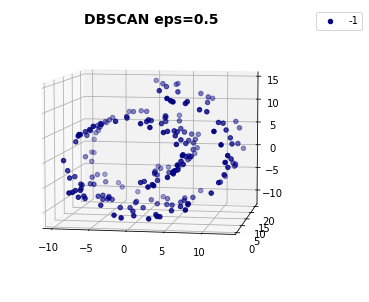

In [5]:
dbscan = cluster.DBSCAN(eps=0.5)
label = dbscan.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('DBSCAN eps=0.5', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(float(i) / len(np.unique(label))), label=l)
    
_ = plt.legend(bbox_to_anchor=(1.25, 1))

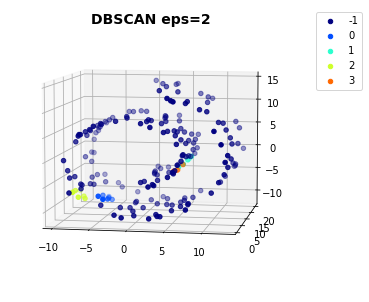

In [6]:
dbscan = cluster.DBSCAN(eps=2, min_samples=5)
label = dbscan.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('DBSCAN eps=2', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(float(i) / len(np.unique(label))), label=l)
    
_ = plt.legend(bbox_to_anchor=(1.25, 1))

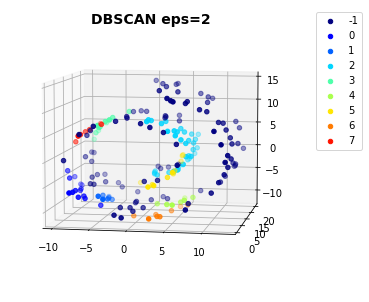

In [7]:
dbscan = cluster.DBSCAN(eps=3, min_samples=5)
label = dbscan.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('DBSCAN eps=2', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(float(i) / len(np.unique(label))), label=l)
    
_ = plt.legend(bbox_to_anchor=(1.25, 1))

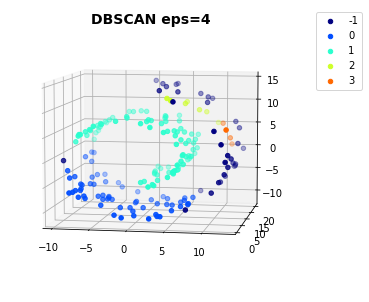

In [8]:
dbscan = cluster.DBSCAN(eps=4, min_samples=5)
label = dbscan.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('DBSCAN eps=4', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(float(i) / len(np.unique(label))), label=l)
    
_ = plt.legend(bbox_to_anchor=(1.25, 1))